<a href="https://colab.research.google.com/github/HoniSanders/state_politics_statistics/blob/main/State_Politics_Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import requests
import unicodedata

# Load Data

In [35]:
# import state income levels data
# from https://en.wikipedia.org/wiki/List_of_U.S._states_and_territories_by_income
state_income_df = pd.read_csv('https://raw.githubusercontent.com/HoniSanders/state_politics_statistics/main/state%20income.csv', sep=',')
print(state_income_df.columns.values.tolist())
state_income_df.rename(columns={"States and Washington D.C.": "State"}, inplace=True)
print(state_income_df.columns.values.tolist())
state_income_df['State'] = state_income_df.apply(lambda row: unicodedata.normalize('NFKD',row['State']), axis=1)
state_income_df.head()

['State Rank', 'States and Washington D.C.', '2019', '2018', '2017', '2016', '2015', '2014', '2013', '2012', '2011', '2010', 'Average annual growth rate (current dollars) in 2010-2019\xa0%']
['State Rank', 'State', '2019', '2018', '2017', '2016', '2015', '2014', '2013', '2012', '2011', '2010', 'Average annual growth rate (current dollars) in 2010-2019\xa0%']


,State Rank,State,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,Average annual growth rate (current dollars) in 2010-2019 %
0,NaN,United States,65712,63179,60336,57617,55775,53657,52250,51371,50502,50046,0.0307
1,–,Washington D.C.,92266,85203,82372,75506,75628,71648,67572,66583,63124,60903,0.0472
2,1,Maryland,86738,83242,80776,78945,75847,73971,72483,71122,70004,68854,0.0260
3,2,Massachusetts,85843,79835,77385,75297,70628,69160,66768,65339,62859,62072,0.0367
4,3,New Jersey,85751,81740,80088,76126,72222,71919,70165,69667,67458,67681,0.0266


In [27]:
# load state abbreviations
abbreviations_df = pd.read_csv('https://raw.githubusercontent.com/HoniSanders/state_politics_statistics/main/state_abbreviations.csv')
abbreviations_dict = {row[1][0]: row[1][1] for row in abbreviations_df.iterrows()}
abbreviations_dict['U.S. TOTAL'] = 'na'
abbreviations_dict['United States'] = 'na'
abbreviations_dict['Washington D.C.'] = 'na'
print(abbreviations_dict)
abbreviations_df.head()

{'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA', 'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA', 'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD', 'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS', 'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ', 'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK', 'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC', 'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA', 'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY', 'District of Columbia': 'DC', 'Guam': 'GU', 'Marshall Islands': 'MH', 'Northe

,US STATE,POSTAL ABBREVIATION,STANDARD ABBREVIATION
0,Alabama,AL,Ala.
1,Alaska,AK,Alaska
2,Arizona,AZ,Ariz.
3,Arkansas,AR,Ark.
4,California,CA,Calif.


In [118]:
# load infant mortality data
# from https://www.cdc.gov/nchs/pressroom/sosmap/infant_mortality_rates/infant_mortality.htm
infant_mortality_df = pd.read_csv('https://raw.githubusercontent.com/HoniSanders/state_politics_statistics/main/infant_mortality_by_state.csv')
def tryconvert(value, default, *types):
    for t in types:
        try:
            return t(value)
        except (ValueError, TypeError):
            continue
    return default
infant_mortality_df['abbreviation'] = infant_mortality_df['STATE']
infant_mortality_df['RATE'] = infant_mortality_df.apply(lambda row: tryconvert(row['RATE'], np.nan, float), axis=1)
print(infant_mortality_df.loc[infant_mortality_df['RATE']==0])
infant_mortality_df.loc[infant_mortality_df['RATE']==0, 'RATE'] = np.nan
print(infant_mortality_df.loc[infant_mortality_df['RATE']==0])
infant_mortality_df.head(100)



    YEAR STATE  RATE  DEATHS                                    URL  \
44  2020    VT   0.0      18  /nchs/pressroom/states/vermont/vt.htm   

   abbreviation  
44           VT  
Empty DataFrame
Columns: [YEAR, STATE, RATE, DEATHS, URL, abbreviation]
Index: []


,YEAR,STATE,RATE,DEATHS,URL,abbreviation
0,2020,AL,7.18,404,/nchs/pressroom/states/alabama/al.htm,AL
1,2020,AK,5.05,49,/nchs/pressroom/states/alaska/ak.htm,AK
2,2020,AZ,4.97,405,/nchs/pressroom/states/arizona/az.htm,AZ
3,2020,AR,7.33,264,/nchs/pressroom/states/arkansas/ar.htm,AR
4,2020,CA,3.69,1651,/nchs/pressroom/states/california/ca.htm,CA
...,...,...,...,...,...,...
95,2019,VA,5.81,566,/nchs/pressroom/states/virginia/va.htm,VA
96,2019,WA,4.26,362,/nchs/pressroom/states/washington/wa.htm,WA
97,2019,WV,6.12,111,/nchs/pressroom/states/westvirginia/wv.htm,WV
98,2019,WI,5.86,371,/nchs/pressroom/states/wisconsin/wi.htm,WI


In [128]:
# load partisan lean data
# from https://fivethirtyeight.com/features/how-red-or-blue-is-your-state-your-congressional-district/
partisan_lean_df = pd.read_csv('https://raw.githubusercontent.com/HoniSanders/state_politics_statistics/main/partisan_lean.csv')
print(partisan_lean_df.columns.values.tolist())
partisan_lean_df['PARTY'] = partisan_lean_df.apply(lambda row: row['PARTISAN LEAN'].split('+')[0], axis=1)
partisan_lean_df['ABS PARTISAN LEAN'] = partisan_lean_df.apply(lambda row: float(row['PARTISAN LEAN'].split('+')[1]), axis=1)
partisan_lean_df['SGN PARTISAN LEAN'] = partisan_lean_df.apply(lambda row: row['ABS PARTISAN LEAN']*(int(row['PARTY']=='D')*2-1), axis=1)
partisan_lean_df.head()
partisan_lean_df.tail()

['STATE', 'PARTISAN LEAN']


,STATE,PARTISAN LEAN,PARTY,ABS PARTISAN LEAN,SGN PARTISAN LEAN
46,West Virginia,R+35.5,R,35.5,-35.5
47,Idaho,R+37.0,R,37.0,-37.0
48,Oklahoma,R+37.2,R,37.2,-37.2
49,North Dakota,R+37.2,R,37.2,-37.2
50,Wyoming,R+49.7,R,49.7,-49.7


In [131]:
# load abortion laws
# from https://worldpopulationreview.com/state-rankings/abortion-laws-by-state
abortion_law_df = pd.read_csv('https://raw.githubusercontent.com/HoniSanders/state_politics_statistics/main/abortionlaws.csv')
abortion_law_df['BOOL_PROHIBITED'] = (abortion_law_df['Status'] == 'Prohibited')
abortion_law_df.head()


,State,NumWeeks,Status,AbortionExceptions,Notes,BOOL_PROHIBITED
0,Alabama,-,Prohibited,Mother's life,"State has competing bans, may need courts to d...",True
1,Alaska,No limit,Legal,None needed,State may require patients to undergo counseling,False
2,Arizona,TBD,Prohibited,Mother's life,"State has competing bans, may need courts to d...",True
3,Arkansas,-,Prohibited,Mother's life,Additional exceptions may be added in future,True
4,California,Viability,Legal,Mother's life,NaN,False


# add state abbreviations to relevant dataframes


In [133]:
# add state abbreviations to relevant dataframes

for df in [state_income_df, partisan_lean_df, abortion_law_df]:
  try:
    df['abbreviation'] = df.apply(lambda row: abbreviations_dict[row.State], axis=1)
  except:
    df['abbreviation'] = df.apply(lambda row: abbreviations_dict[row.STATE], axis=1)
  print(df.head())

  State Rank            State   2019   2018   2017   2016   2015   2014  \
0        NaN    United States  65712  63179  60336  57617  55775  53657   
1          –  Washington D.C.  92266  85203  82372  75506  75628  71648   
2          1         Maryland  86738  83242  80776  78945  75847  73971   
3          2    Massachusetts  85843  79835  77385  75297  70628  69160   
4          3       New Jersey  85751  81740  80088  76126  72222  71919   

    2013   2012   2011   2010  \
0  52250  51371  50502  50046   
1  67572  66583  63124  60903   
2  72483  71122  70004  68854   
3  66768  65339  62859  62072   
4  70165  69667  67458  67681   

   Average annual growth rate (current dollars) in 2010-2019 % abbreviation  
0                                             0.0307                     na  
1                                             0.0472                     na  
2                                             0.0260                     MD  
3                                     

# Combine Data Frames

In [134]:
# create merged dataframe with data from original dataframes
print(infant_mortality_df.loc[infant_mortality_df['YEAR']==2020].head())
data_df = state_income_df.merge(infant_mortality_df.loc[infant_mortality_df.YEAR==2020], on='abbreviation')
data_df = data_df.merge(partisan_lean_df, on='abbreviation')
data_df = data_df.merge(abortion_law_df, on='abbreviation')
print(data_df.shape)
data_df.head()

   YEAR STATE  RATE  DEATHS                                       URL  \
0  2020    AL  7.18     404     /nchs/pressroom/states/alabama/al.htm   
1  2020    AK  5.05      49      /nchs/pressroom/states/alaska/ak.htm   
2  2020    AZ  4.97     405     /nchs/pressroom/states/arizona/az.htm   
3  2020    AR  7.33     264    /nchs/pressroom/states/arkansas/ar.htm   
4  2020    CA  3.69    1651  /nchs/pressroom/states/california/ca.htm   

  abbreviation  
0           AL  
1           AK  
2           AZ  
3           AR  
4           CA  
(50, 30)


,State Rank,State_x,2019,2018,2017,2016,2015,2014,2013,2012,...,PARTISAN LEAN,PARTY,ABS PARTISAN LEAN,SGN PARTISAN LEAN,State_y,NumWeeks,Status,AbortionExceptions,Notes,BOOL_PROHIBITED
0,1,Maryland,86738,83242,80776,78945,75847,73971,72483,71122,...,D+25.9,D,25.9,25.9,Maryland,Viability,Legal,Mother's life or severe fetal anomaly,"Unless abuse is a concern, minors must notify ...",False
1,2,Massachusetts,85843,79835,77385,75297,70628,69160,66768,65339,...,D+32.6,D,32.6,32.6,Massachusetts,24 weeks,Legal,Mother's life or severe fetal anomaly,Minors must obtain parental permission,False
2,3,New Jersey,85751,81740,80088,76126,72222,71919,70165,69667,...,D+12.0,D,12.0,12.0,New Jersey,No limit,Legal,None needed,NaN,False
3,4,Hawaii,83102,80212,77765,74511,73486,69592,68020,66259,...,D+31.6,D,31.6,31.6,Hawaii,Viability,Legal,Mother's life,NaN,False
4,5,California,80440,75277,71805,67739,64500,61933,60190,58328,...,D+25.5,D,25.5,25.5,California,Viability,Legal,Mother's life,NaN,False


Text(0.5, 1.0, 'State Infant Mortality Data')

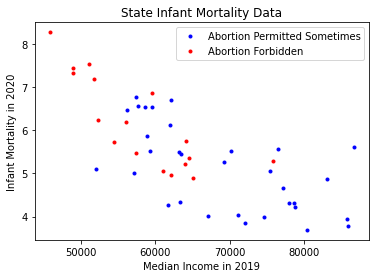

In [135]:
Permitted_df = data_df.loc[~data_df.BOOL_PROHIBITED]
plt.plot(Permitted_df['2019'], Permitted_df.RATE,'.b')
Prohibited_df = data_df.loc[data_df.BOOL_PROHIBITED]
plt.plot(Prohibited_df['2019'], Prohibited_df.RATE,'.r')
plt.legend(('Abortion Permitted Sometimes', 'Abortion Forbidden'))
plt.xlabel('Median Income in 2019')
plt.ylabel('Infant Mortality in 2020')
plt.title('State Infant Mortality Data')

Text(0.5, 1.0, 'State Infant Mortality Data')

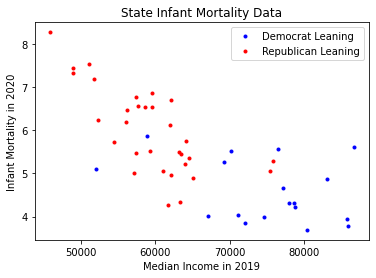

In [122]:
D_df = data_df.loc[data_df['PARTY'] == 'D']
plt.plot(D_df['2019'], D_df.RATE,'.b')
R_df = data_df.loc[data_df['PARTY'] == 'R']
plt.plot(R_df['2019'], R_df.RATE,'.r')
plt.legend(('Democrat Leaning', 'Republican Leaning'))
plt.xlabel('Median Income in 2019')
plt.ylabel('Infant Mortality in 2020')
plt.title('State Infant Mortality Data')

Text(0.5, 1.0, 'State Infant Mortality Data')

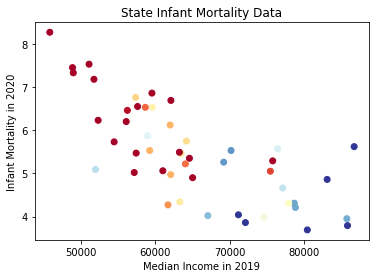

In [127]:
D_df = data_df.loc[data_df['PARTY'] == 'D']
#plt.plot(D_df['2019'], D_df.RATE,'.b')
R_df = data_df.loc[data_df['PARTY'] == 'R']
#plt.plot(R_df['2019'], R_df.RATE,'.r')
plt.scatter(data_df['2019'], data_df['RATE'], c=data_df['SGN PARTISAN LEAN'], cmap='RdYlBu', vmin=-20, vmax=20)
plt.xlabel('Median Income in 2019')
plt.ylabel('Infant Mortality in 2020')
plt.title('State Infant Mortality Data')

Text(0.5, 1.0, 'State Infant Mortality Data')

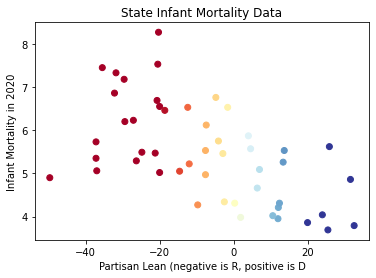

In [126]:

plt.scatter(data_df['SGN PARTISAN LEAN'], data_df['RATE'], c=data_df['SGN PARTISAN LEAN'], cmap='RdYlBu', vmin=-20, vmax=20)
plt.xlabel('Partisan Lean (negative is R, positive is D')
plt.ylabel('Infant Mortality in 2020')
plt.title('State Infant Mortality Data')